In [43]:
import os
datapath = ['../data']

# Question
* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (SalePrice).
* There are three different types: integers (int64), floats (float64), and strings (object, categoricals). Examine how many there are of each data type

In [44]:
import pandas as pd
fileName = ['Ames_Housing_Sales.csv']
filePath = os.sep.join(datapath+fileName)
df = pd.read_csv(filePath)
print(df.shape)
print(df.dtypes.value_counts())
df.head(1).T

(1379, 80)
object     43
float64    21
int64      16
dtype: int64


,0
1stFlrSF,856
2ndFlrSF,854
3SsnPorch,0
Alley,None
BedroomAbvGr,3
BldgType,1Fam
BsmtCond,TA
BsmtExposure,No
BsmtFinSF1,706
BsmtFinSF2,0


# Question 2
* As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

* This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

* Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is n-1, where n is the number of categories.

In [45]:
import numpy as np
mask = df.dtypes == np.object
categoricalcolumn = df.columns[mask]
categoricalcolumn.shape

num_ohc_cols = (df[categoricalcolumn]
 .apply(lambda x : x.nunique())
 .sort_values(ascending=False))
print(num_ohc_cols)

small_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

small_ohc_cols -= 1
#print(small_ohc_cols)
#print(num_ohc_cols.index)
small_ohc_cols.sum()


Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      7
FireplaceQu       6
Foundation        6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
Heating           6
GarageType        6
BsmtExposure      5
Electrical        5
Fence             5
GarageCond        5
GarageQual        5
BsmtQual          5
LotConfig         5
MSZoning          5
MiscFeature       5
BldgType          5
HeatingQC         5
KitchenQual       4
LandContour       4
BsmtCond          4
LotShape          4
MasVnrType        4
ExterQual         4
ExterCond         4
PoolQC            4
Alley             3
GarageFinish      3
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64


215

# Question 3
Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

Used the dataframe .copy() method to create a completely separate copy of the dataframe for one-hot encoding
On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
For the data that are not one-hot encoded, drop the columns that are string categoricals.

In [46]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
df_copy = df.copy()
# print(df_copy.shape)
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    dat = le.fit_transform(df_copy[col]).astype(np.int)   # Transform labeled data into integer
    df_copy = df_copy.drop(col,axis=1)                    # drop  the axis 
    #print(dat)
    new_dat = ohc.fit_transform(dat.reshape(-1,1))          #   Reshape into sparse matric
    #print("dat shape:",dat.reshape(-1,1))
    n_cols = new_dat.shape[1]                               #   column size
    
    col_names = ['_'.join([col,str(x)]) for x in range(n_cols)]       #  Rename column  
    #print(col_names)
    new_df = pd.DataFrame(new_dat.toarray(),index=df_copy.index,columns=col_names)   # Convert to  the data Frame

    df_copy = pd.concat([df_copy,new_df],axis=1)        # Concatenate the data into each other


print(df_copy.shape[1]-df.shape[1])
df  =df.drop(num_ohc_cols.index,axis=1)
#df_copy.head(1).T

['Neighborhood_0', 'Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3', 'Neighborhood_4', 'Neighborhood_5', 'Neighborhood_6', 'Neighborhood_7', 'Neighborhood_8', 'Neighborhood_9', 'Neighborhood_10', 'Neighborhood_11', 'Neighborhood_12', 'Neighborhood_13', 'Neighborhood_14', 'Neighborhood_15', 'Neighborhood_16', 'Neighborhood_17', 'Neighborhood_18', 'Neighborhood_19', 'Neighborhood_20', 'Neighborhood_21', 'Neighborhood_22', 'Neighborhood_23', 'Neighborhood_24']
['Exterior2nd_0', 'Exterior2nd_1', 'Exterior2nd_2', 'Exterior2nd_3', 'Exterior2nd_4', 'Exterior2nd_5', 'Exterior2nd_6', 'Exterior2nd_7', 'Exterior2nd_8', 'Exterior2nd_9', 'Exterior2nd_10', 'Exterior2nd_11', 'Exterior2nd_12', 'Exterior2nd_13', 'Exterior2nd_14', 'Exterior2nd_15']
['Exterior1st_0', 'Exterior1st_1', 'Exterior1st_2', 'Exterior1st_3', 'Exterior1st_4', 'Exterior1st_5', 'Exterior1st_6', 'Exterior1st_7', 'Exterior1st_8', 'Exterior1st_9', 'Exterior1st_10', 'Exterior1st_11', 'Exterior1st_12', 'Exterior1st_13']
['SaleType_0

# Question 4
* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same random_state in each of the two splits.
For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.cross_validation import train_test_split

label_col = 'SalePrice'

# Normal original data 
feature_col = [col for col in df.columns if col!=label_col]
x = df[feature_col]
y = df[label_col]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=20)



# One hot column datasets
feature_ohc_col = [col for col in df_copy.columns if col!=label_col]
x_ohc = df_copy[feature_ohc_col]
y_ohc = df_copy[label_col]
x_ohc_train,x_ohc_test,y_ohc_train,y_ohc_test = train_test_split(x_ohc,y_ohc,test_size=.3,random_state=20)

errordf = list()
r2scoredf = list()
scoredf = list()

LR = LinearRegression()
(x_train.index  == x_ohc_train.index).all

lrmodel = LR.fit(x_train,y_train)
y_train_predict = lrmodel.predict(x_train)
y_test_predict = lrmodel.predict(x_test)

errordf.append(pd.Series({'Train_mse':mean_squared_error(y_train,y_train_predict),
                 'Test_mse':mean_squared_error(y_test,y_test_predict)},name='Data_mse_error'))
r2scoredf.append(pd.Series({'Train_r2score':r2_score(y_train,y_train_predict),
                 'Test_r2score':r2_score(y_test,y_test_predict)},name='Data_r2score'))

scoredf.append(pd.Series({'Train_score':lrmodel.score(x_train,y_train),
                 'Test_score':lrmodel.score(x_test,y_test)},name='Data_score'))


lrmodel1 = LR.fit(x_ohc_train,y_ohc_train)
y_ohc_train_predict = lrmodel.predict(x_ohc_train)
y_ohc_test_predict = lrmodel.predict(x_ohc_test)
               
errordf.append(pd.Series({'Train_mse':mean_squared_error(y_ohc_train,y_ohc_train_predict),
                 'Test_mse':mean_squared_error(y_ohc_test,y_ohc_test_predict)},name='OHC_mse_error'))

r2scoredf.append(pd.Series({'Train_r2score':r2_score(y_ohc_train,y_ohc_train_predict),
                 'Test_r2score':r2_score(y_ohc_test,y_ohc_test_predict)},name='Data_ohc_r2score'))

scoredf.append(pd.Series({'Train_score':lrmodel.score(x_ohc_train,y_ohc_train),
                 'Test_score':lrmodel.score(x_ohc_test,y_ohc_test)},name='Data_ohc_score'))

errordf = pd.concat(errordf,axis=1)
errordf
r2score = pd.concat(r2scoredf,axis=1)
score = pd.concat(scoredf,axis=1)
errordf

/home/maniram/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Data_mse_error,OHC_mse_error
Test_mse,1.876566e+09,7.758777e+17
Train_mse,9.679326e+08,3.812915e+08


### OneHotEncoder MSE error is so high. it is overfitting the model

#    

# Question 5
For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: StandardScaler, MinMaxScaler, MaxAbsScaler.
* Compare the error calculated on the test sets

In [6]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler

training_stes={
    'original_training':(x_train,x_test,y_train,y_test),
    'ohc_training':(x_ohc_train,x_ohc_test,y_ohc_train,y_ohc_test)
}

scalars ={
    'minmaxscalar':MinMaxScaler(),
    'standard_scalar':StandardScaler(),
    'maxabs_scalar':MaxAbsScaler()
}

errors ={}
mask = x_train.dtypes == np.float
float_columns = x_train.columns[mask]
LR = LinearRegression()

for train_encoder,(xtrain,xtest,ytrain,ytest) in training_stes.items():
    for scalar_encoder,scalar_instance in scalars.items(): 
        trainingset = xtrain.copy()
        testset = xtest.copy()
        
        trainingset[float_columns] = scalar_instance.fit_transform(trainingset[float_columns])
        testset[float_columns] = scalar_instance.fit_transform(testset[float_columns])
        
        LR.fit(trainingset,ytrain)
        predict_ytest =  LR.predict(testset)
        
        key = train_encoder+'_'+scalar_encoder+'_'+'scaling'
        errors[key] = mean_squared_error(predict_ytest,ytest)

        
errors = pd.Series(errors)        
print(errors.to_string())
print("_"*100)
for key,val in errors.items():
    print(key,'  :  ',val,end='\n')
        

ohc_training_maxabs_scalar_scaling           2.256695e+09
ohc_training_minmaxscalar_scaling            2.295065e+09
ohc_training_standard_scalar_scaling         2.042922e+09
original_training_maxabs_scalar_scaling      7.583137e+27
original_training_minmaxscalar_scaling       1.217606e+28
original_training_standard_scalar_scaling    1.867713e+09
____________________________________________________________________________________________________
ohc_training_maxabs_scalar_scaling   :   2256694636.35
ohc_training_minmaxscalar_scaling   :   2295064842.01
ohc_training_standard_scalar_scaling   :   2042922054.11
original_training_maxabs_scalar_scaling   :   7.58313682154e+27
original_training_minmaxscalar_scaling   :   1.21760567115e+28
original_training_standard_scalar_scaling   :   1867712755.89


# Question 6
Plot predictions vs actual for one of the models.

[Text(0,0.5,'Predicted value'),
 Text(0.5,0,'Ground truth'),
 Text(0.5,1,'train - Predict block')]

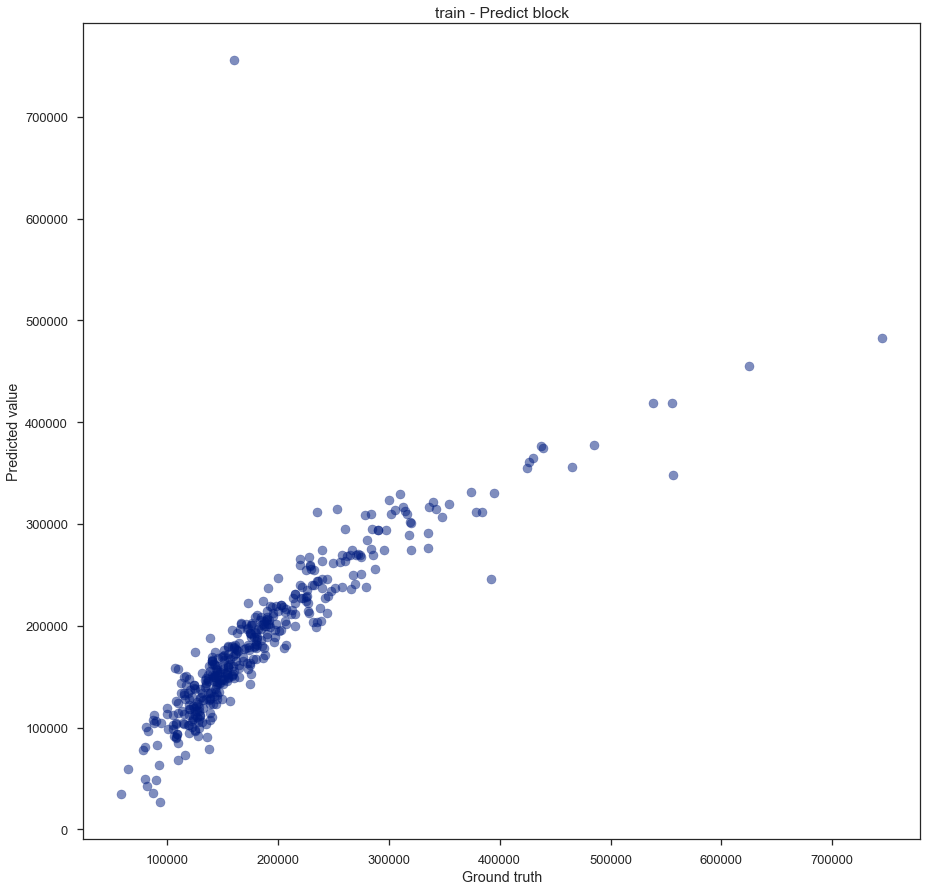

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
plt.rcParams['figure.figsize']=(15,15)

ax = plt.axes()# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None
ax.scatter(y_test,y_test_predict,alpha=.5)

ax.set(xlabel='Ground truth',ylabel='Predicted value',title='train - Predict block')